##  Kaggle Competition

## Mercedes-Benz Greener Manufacturing

### Author : Varad Shah      
### NUID : 001052402

### Abstract 
Mercedes-Benz Greener Manufacturing wants to speedier their car testing process, and thus lowering carbon dioxide emissions.<br>
In this competition, Our goal is to help mercedes-benz to tackle the curse of dimensionality and reduce the time that cars spend on the test bench.
<br>We have give a  dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. <br>
Submissions for this competition is evaluated on the R^2 value, also called the coefficient of determination.<br>

This notebook walks you through exploratory data analysis,first, in order to get how different features are affecting the time taken for car test,how they are correlated with each other,etc. After analyzing insights, dropping not so important features, basically after preprocessing data, I have built model based on XGB regressor algorithm. The model is also tuned in order to improve coefficient of determination.


### Data Set
The data features are anonymised and we only know that each represents a custom car feature. The target variable y is the time in seconds that the car needs to pass the test. This is the variable that we are challenged to predict. 
Variables with letters are categorical. Variables with 0/1 are binary values.
The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.<br>

Data is given in .csv file formats <br>
train.csv - the training set <br>
test.csv - the test set, we have to predict the 'y' variable for the 'ID's in this file. <br>


## Let's Begin

In [4]:
#Importing required Packages
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

###  Importing Data 

In [5]:
trainfile = 'https://raw.githubusercontent.com/shubham414/Advanced-Data-Science/main/Assignment%202/train.csv'
testfile = 'https://raw.githubusercontent.com/shubham414/Advanced-Data-Science/main/Assignment%202/test.csv'


In [6]:
# read datasets
train = pd.read_csv(trainfile)
test = pd.read_csv(testfile)

In [7]:
print('Size of training set: {} rows and {} columns'.format(*train.shape))
train.head()

Size of training set: 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print('Size of test set: {} rows and {} columns'.format(*test.shape))
test.head()

Size of test set: 4209 rows and 377 columns


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [9]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.isnull().any().value_counts()  #checking if there is any null values in the dataset

False    378
dtype: int64

In [11]:
test.isnull().any().value_counts()

False    377
dtype: int64

In [12]:
cols = [c for c in train.columns if 'X' in c]   #Checking different type of data present in dataset
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
train[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [13]:
counts = [[], [], []]             
for c in cols:                    # this function checks for binary and categorical features.  
    typ = train[c].dtype          # Additionally, it also checks features with same value for all data.
    uniq = len(np.unique(train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('--------------')
print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

--------------
Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [14]:
#performing above two operation on test data set


cols2 = [c for c in test.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
test[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [16]:
counts2 = [[], [], []]
for c in cols2:
    typ = test[c].dtype
    uniq = len(np.unique(test[c]))
    if uniq == 1: counts2[0].append(c)
    elif uniq == 2 and typ == np.int64: counts2[1].append(c)
    else: counts2[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts2[0])
print('Categorical features:', counts2[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X257', 'X258', 'X295', 'X296', 'X369']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


#### Dropping constant features  from both training and test data as they won't have impact in prediction.

In [13]:
train = train.drop(['X11'], axis=1)
train = train.drop(['X93'], axis=1)
train = train.drop(['X107'], axis=1)
train = train.drop(['X233'], axis=1)
train = train.drop(['X235'], axis=1)
train = train.drop(['X289'], axis=1)
train = train.drop(['X290'], axis=1)
train = train.drop(['X293'], axis=1)
train = train.drop(['X297'], axis=1)
train = train.drop(['X330'], axis=1)
train = train.drop(['X347'], axis=1)

train = train.drop(['X257'], axis=1)
train = train.drop(['X258'], axis=1)
train = train.drop(['X295'], axis=1)
train = train.drop(['X296'], axis=1)
train = train.drop(['X369'], axis=1)

train = train.drop(['X268'], axis=1)

In [14]:
train.shape

(4209, 361)

In [15]:
test = test.drop(['X11'], axis=1)
test = test.drop(['X93'], axis=1)
test = test.drop(['X107'], axis=1)
test = test.drop(['X233'], axis=1)
test = test.drop(['X235'], axis=1)
test = test.drop(['X289'], axis=1)
test = test.drop(['X290'], axis=1)
test = test.drop(['X293'], axis=1)
test = test.drop(['X297'], axis=1)
test = test.drop(['X330'], axis=1)
test = test.drop(['X347'], axis=1)

test = test.drop(['X257'], axis=1)
test = test.drop(['X258'], axis=1)
test = test.drop(['X295'], axis=1)
test = test.drop(['X296'], axis=1)
test = test.drop(['X369'], axis=1)

test = test.drop(['X268'], axis=1)

In [16]:
test.shape

(4209, 360)

In [17]:
# creating separate dataframe with categorical features only(train dataset)
objects = ['O']
df_cat = train.select_dtypes(include=objects)
df_cat

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [18]:
# Creating separate dataframe for numerical features to analyze them.
numerics = ['int64','float64']
df_num = train.select_dtypes(include=numerics)
df_num

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Printing unique values each categorical feature of train dataset.
for i in df_cat.columns:
    print('The unique values in '+i+' are: ',train[i].nunique(),'\n',df_cat[i].unique(),'\n',
          "--------------------------------------------------------------------------------")

The unique values in X0 are:  47 
 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab'] 
 --------------------------------------------------------------------------------
The unique values in X1 are:  27 
 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab'] 
 --------------------------------------------------------------------------------
The unique values in X2 are:  44 
 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar'] 
 --------------------------------------------------------------------------------
The unique values in X3 are:  7 
 ['a' 'e' 'c' 'f' 'd' 'b' 'g'] 
 ----------------------------------------------------

In [20]:
#creating separate dataframe with categorical features only(test dataset)
objects = ['O']
df_cat2 = test.select_dtypes(include=objects)
df_cat2

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [21]:
# Printing unique values each categorical feature of test dataset.
for i in df_cat2.columns:
    print('The unique values in '+i+' are: ',test[i].nunique(),'\n',df_cat2[i].unique(),'\n',
          "--------------------------------------------------------------------------------")

The unique values in X0 are:  49 
 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb'] 
 --------------------------------------------------------------------------------
The unique values in X1 are:  27 
 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab'] 
 --------------------------------------------------------------------------------
The unique values in X2 are:  45 
 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u'] 
 --------------------------------------------------------------------------------
The unique values in X3 are:  7 
 ['f' 'a' 'c' 'e' 'd' 'g' 'b'] 
 -----------------------------------

### Let's plot how different features value are distributed in their respective categories

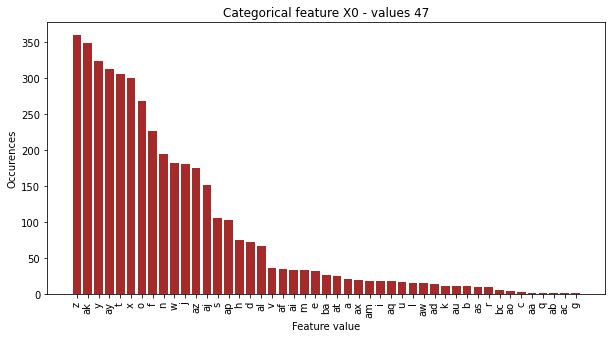

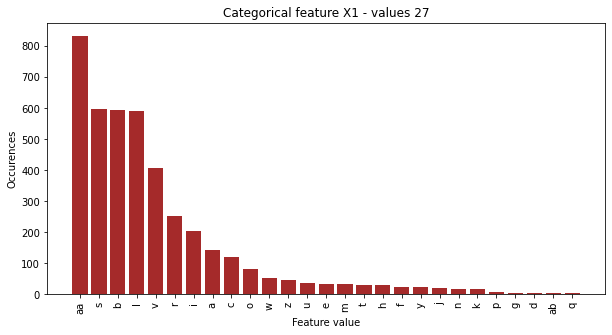

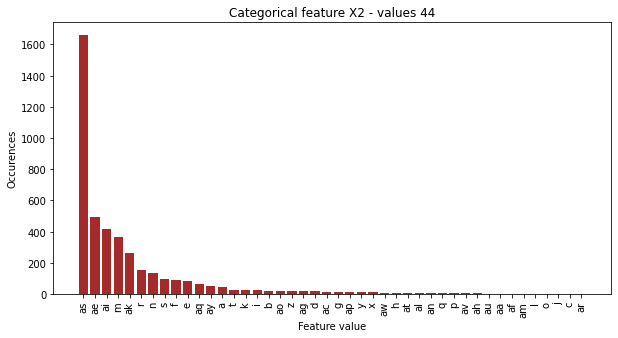

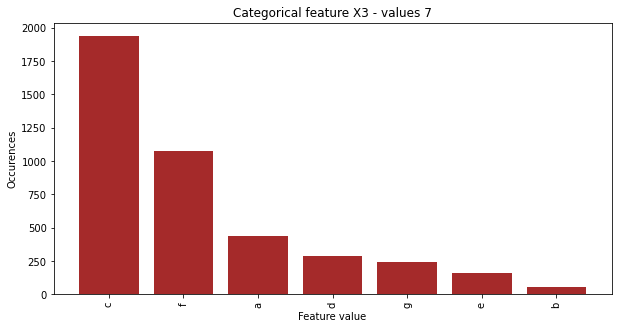

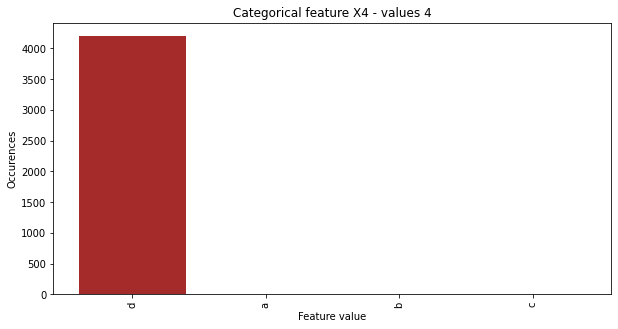

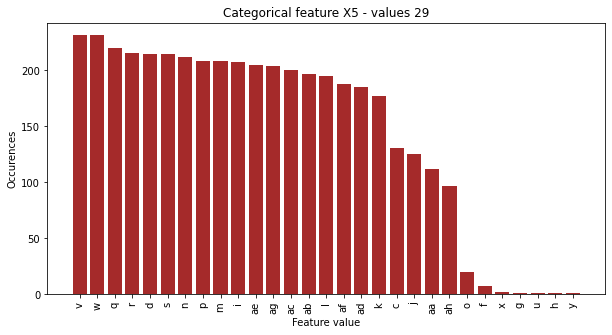

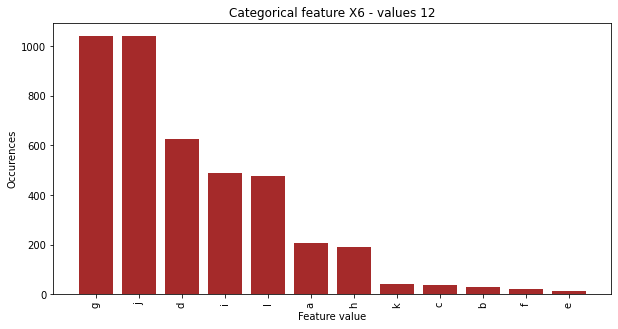

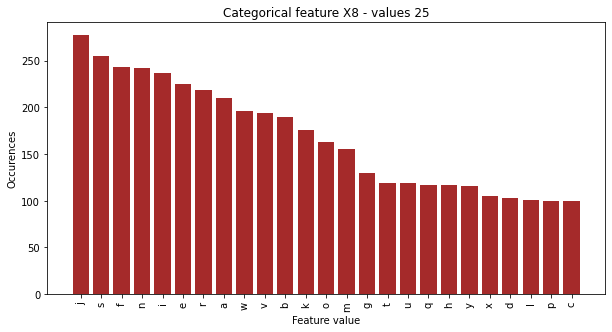

In [22]:

for c in counts[2]:
    value_counts = train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - values {}'.format(c, len(np.unique(train[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values, color='brown')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

In [23]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [24]:
import seaborn as sns

<AxesSubplot:title={'center':'Outlier Detection in target column via Histogram'}, xlabel='y'>

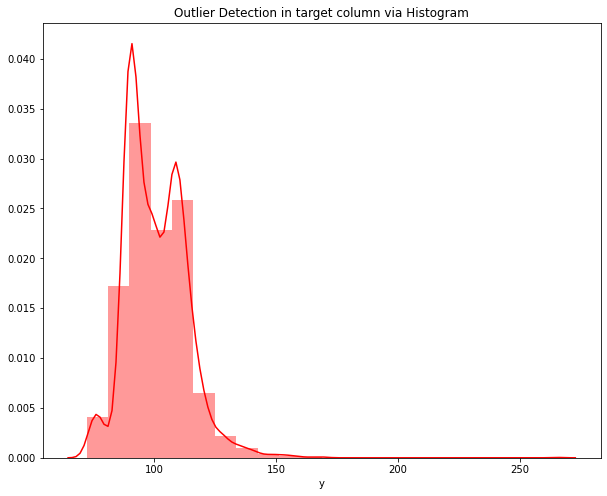

In [25]:
# Plotting distribution of target column(y) of train dataset
plt.figure(figsize=(10,8))
plt.title("Outlier Detection in target column via Histogram")
sns.distplot(train['y'],color='red',bins=22)

#### We have a pretty standard distribution here, which is centred around almost exactly 100. 

Text(0.5, 1.0, 'Outlier Detection in target column via Boxplot')

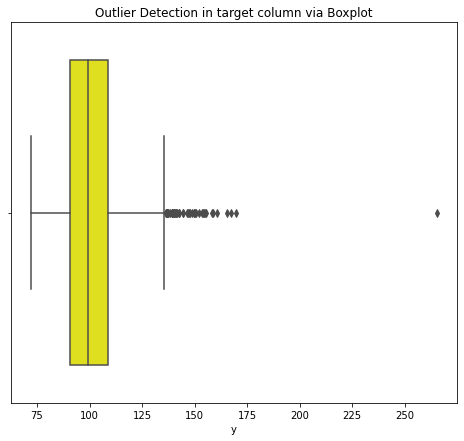

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(train['y'],color='yellow')
plt.title("Outlier Detection in target column via Boxplot")

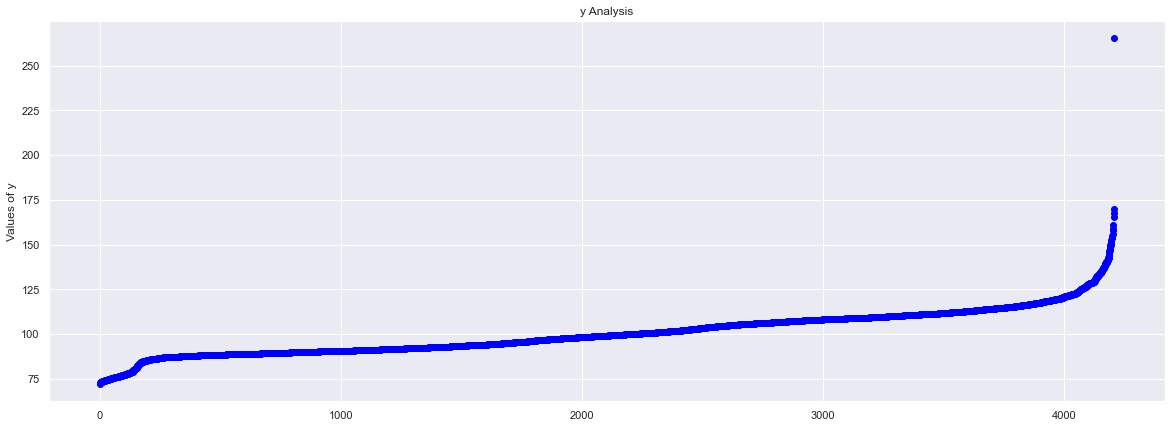

In [27]:
sns.set(rc={'figure.figsize':(20,7)})
plt.title("y Analysis")
plt.ylabel("Values of y")
plt.scatter(range(train.shape[0]),np.sort(train.y.values),color='blue')

#### From above plots,we can see that the outliers are above a value of approx.140. We will remove outliers after 150.

In [28]:
#adding y(target column) to train dataset's category specific dataframe to analyze how categorical features are 
#performing with respect to y
temp=train.y.values
df_cat['y']=temp
print(df_cat.head())

   X0 X1  X2 X3 X4 X5 X6 X8       y
0   k  v  at  a  d  u  j  o  130.81
1   k  t  av  e  d  y  l  o   88.53
2  az  w   n  c  d  x  j  x   76.26
3  az  t   n  f  d  x  l  e   80.62
4  az  v   n  f  d  h  d  n   78.02


In [29]:
print((train.loc[train.y>150,'y'].values))
train=train[train.y<150]
print("Removing outliers")
print(train.shape)
df_cat=df_cat[df_cat.y<150]
df_num=df_num[df_num.y<150]

[150.43 169.91 154.87 265.32 158.53 154.43 160.87 150.89 152.32 167.45
 154.16 158.23 153.51 165.52 155.62]
Removing outliers
(4194, 361)


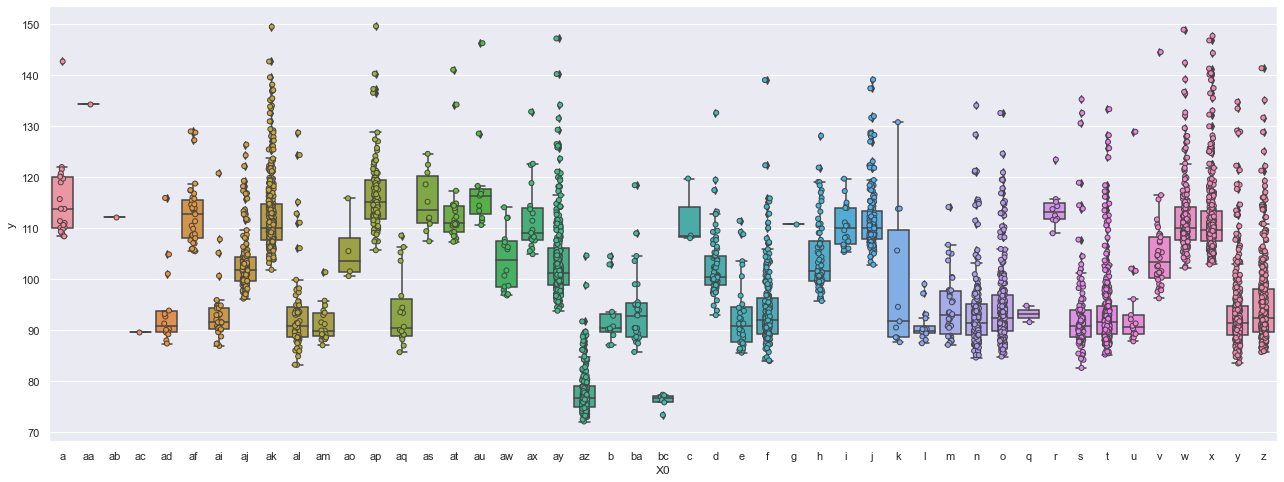

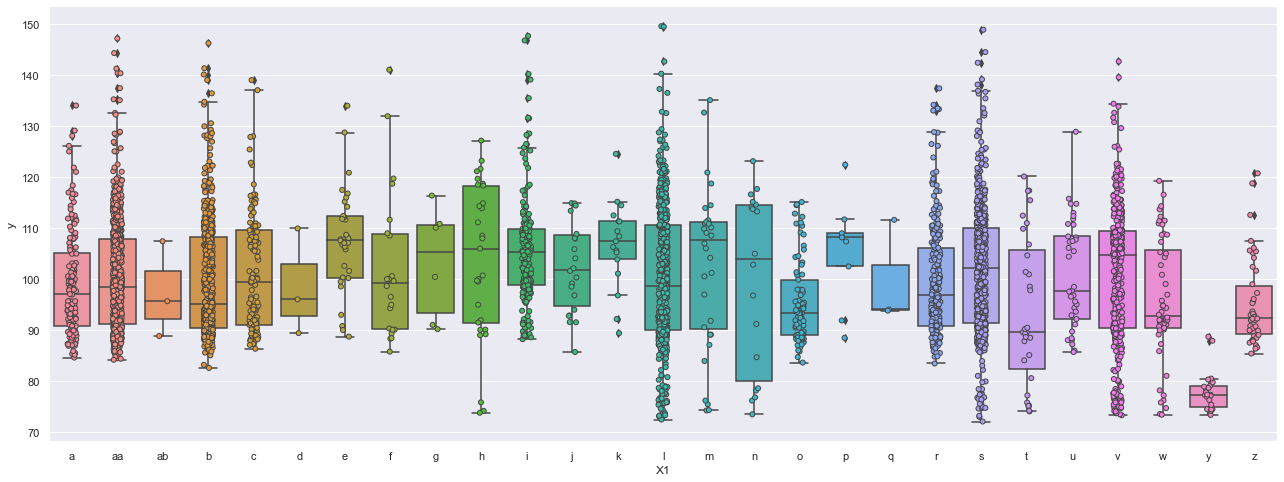

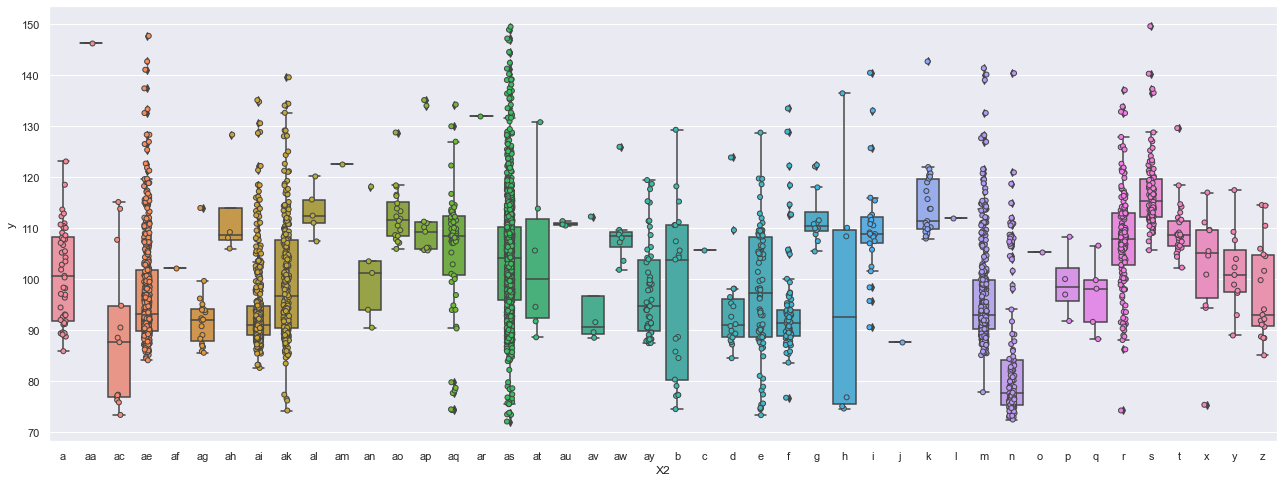

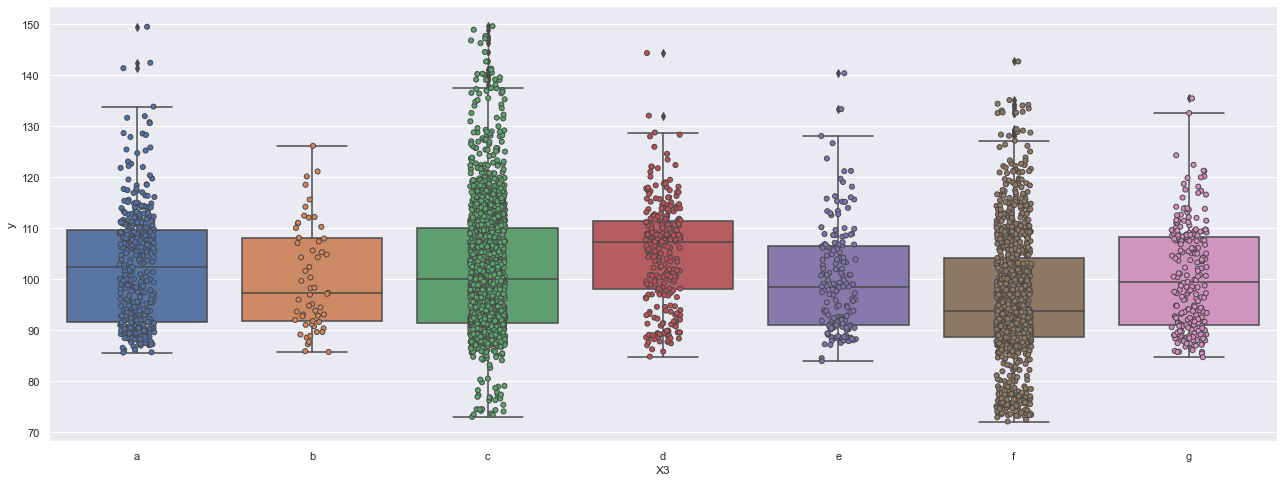

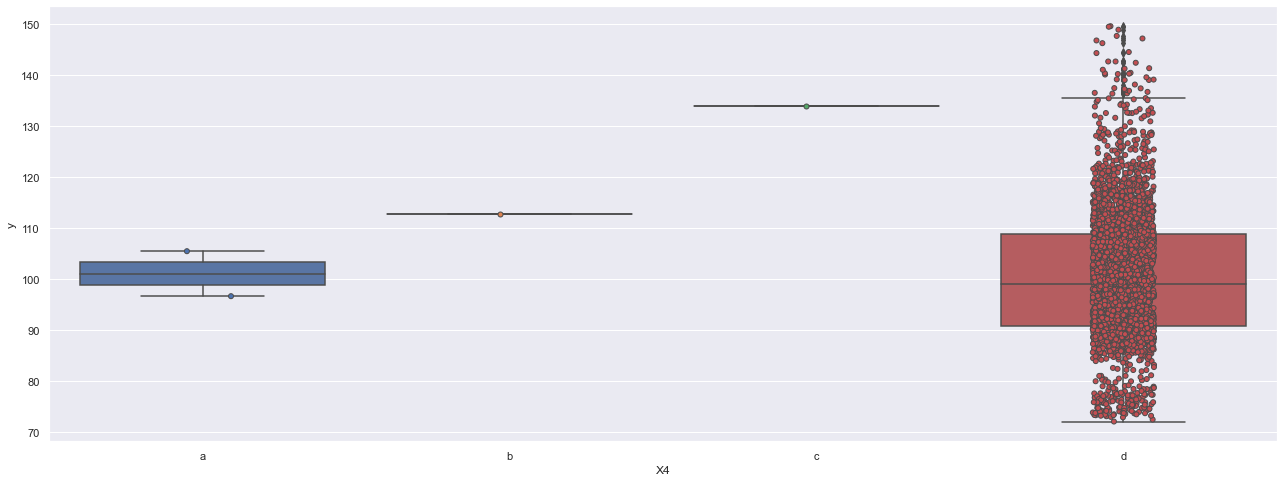

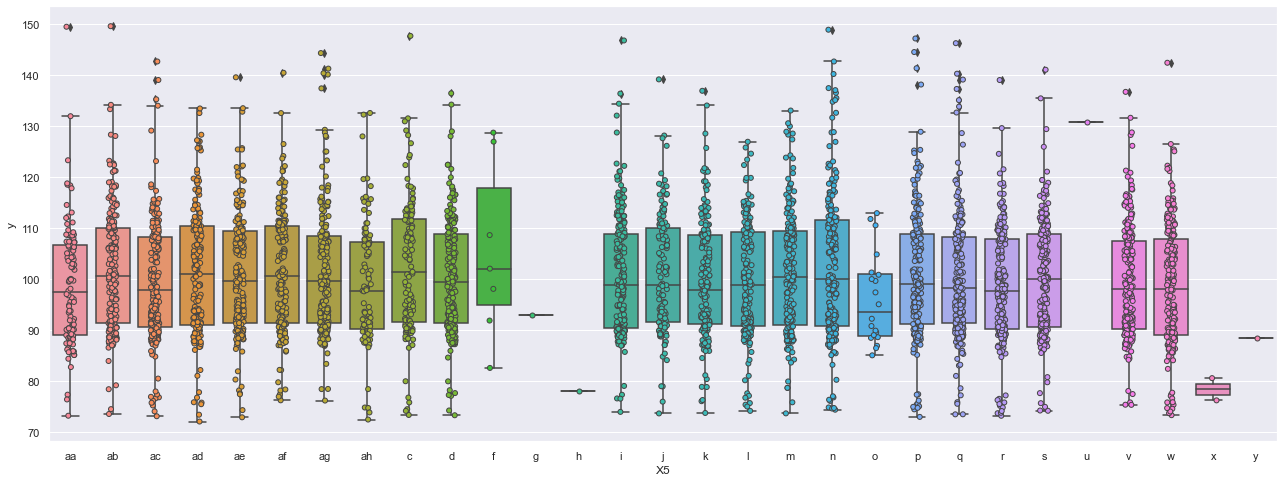

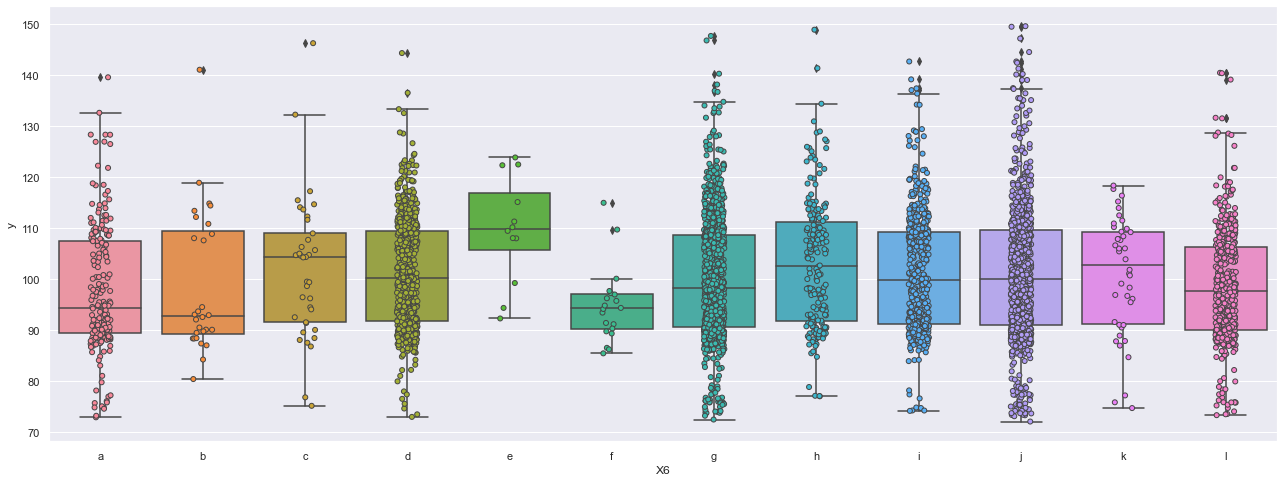

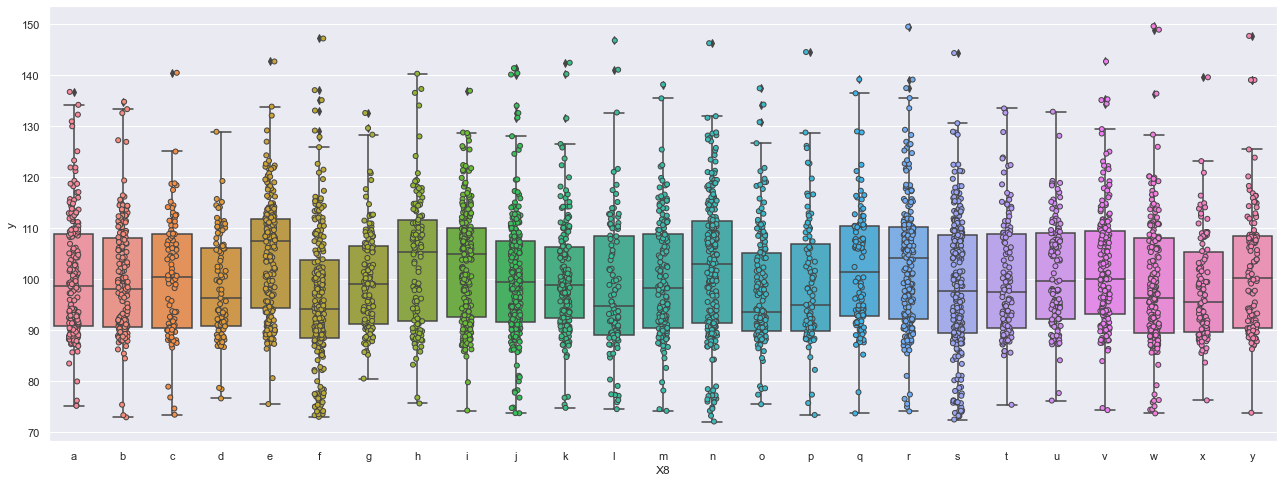

In [30]:
# plotting box plot of each categorical feature with respect to target column(y)

rcParams['figure.figsize'] = 22, 8
for i in df_cat.columns:
    if i not in 'y':
        plt.figure()
        plt.xlabel=i
        sns.stripplot(x=i, y="y", data=train,jitter=True, linewidth=1,order=np.sort(train[i].unique()))
        sns.boxplot(x=i, y="y", data=train, order=np.sort(train[i].unique()))
        plt.show()

#### Feature levels: X0:az, X0:bc, X1:y, X2:n, X5:h, X5:x shows lowest y values. These ones are a pretty good predictor for having low y(low car testing time).
#### In Categorical Feature X4 box plot, only feature value d is dominated. Let's drop this column from both train and test

In [31]:
train = train.drop(['X4'], axis=1)

In [32]:
train.shape

(4194, 360)

In [33]:
train.head(5)

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:

test = test.drop(['X4'], axis=1)

In [35]:
test.shape

(4209, 359)

In [36]:
test.head(5)

,ID,X0,X1,X2,X3,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Processing categorical features/columns, applying LabelEncoder to categorical features

In [37]:

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

#### Plotting correlation map of categorical values to get overall how categorical columns are correlated to each other

<AxesSubplot:>

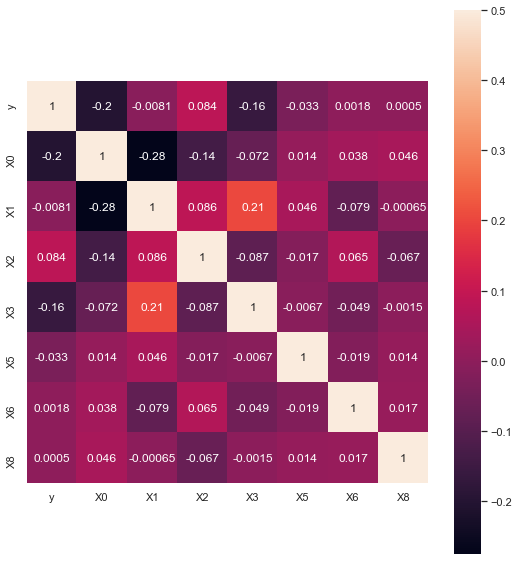

In [38]:
correlation_map = train[train.columns[1:9]].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,10)
sns.heatmap(correlation_map,vmax=.5,square=True,annot=True)

#### Let's check the correlation between the variables and eliminate the one's that have high correlation

In [ ]:

# threshold for removing correlated variables
threshold = 0.9

#Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

In [ ]:
# Select columns with correlations above threshold
column_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(column_drop)))
print ("Following columns can be dropped {}".format(column_drop))

In [ ]:
train = train.drop(columns = column_drop)
test = test.drop(columns = column_drop)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

### Let's analyze Feature 'ID' 

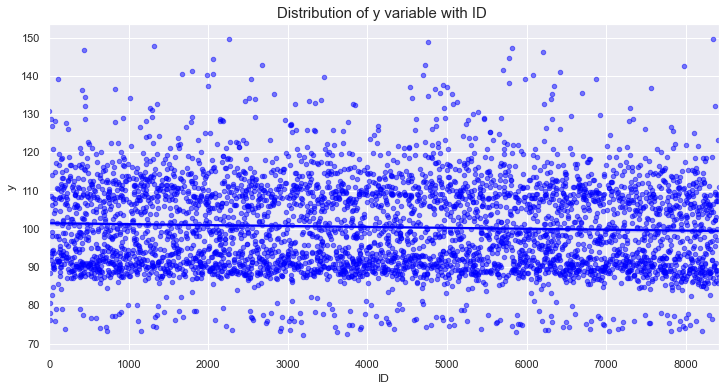

In [41]:

plt.figure(figsize=(12,6))
sns.regplot(x="ID", y='y', data=train, scatter_kws={'alpha':0.5, 's':20}, color='blue')
plt.title("Distribution of y variable with ID ", fontsize=15)
plt.show()

#### Thing to note : ID is not equal to row ID. <br> This suggest that the train and test sets were randomly sampled from the same dataset. <br>Also, We can see from the above plot that ID is following slightly decreasing trend wrt y. May be cars with higher id took less time for test. This feature might be significant and should not be eliminated as it has importance in estimating y.

### Let's build a model now

### XGBRegressor

In [42]:
import xgboost as xgb

In [43]:
train_y = train["y"].values
train_X = train.drop(['y'], axis=1)

In [44]:
#Fitting XGB regressor 
model = xgb.XGBRegressor()
#training model
model.fit(train_X,train_y)
print (model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [45]:
id_vals = test.ID.values
#testing model on test data
output = model.predict(data=test)
simple_df = pd.DataFrame()
simple_df["id"] = id_vals
simple_df["y"] = output
simple_df.to_csv("simxgb.csv",index=False)
simple_df.head()

,id,y
0,1,87.510895
1,2,94.566772
2,3,78.221291
3,4,77.013336
4,5,120.167419


#### R2 score when uploaded on kaggle: 0.47819 (not so great :-|)

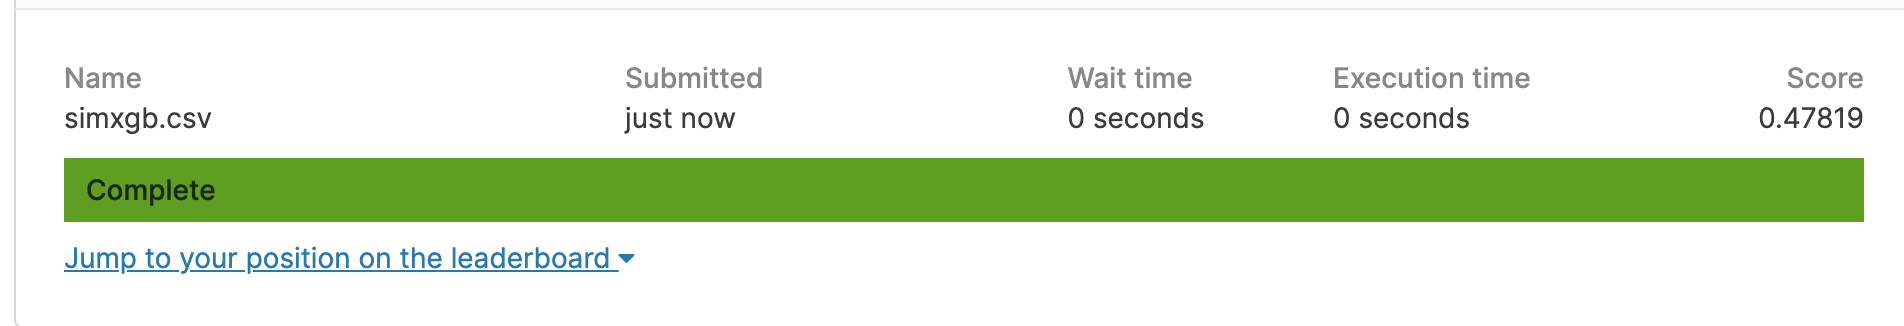

In [51]:
from PIL import Image
img = Image.open("kaggle_simxgb.png")
img

In [58]:
## Let's perform hyperparameter tuning

### XGBRegressor hyperparameter tuning

[15:49:36] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:49:38] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Feature Importance by XGBoost


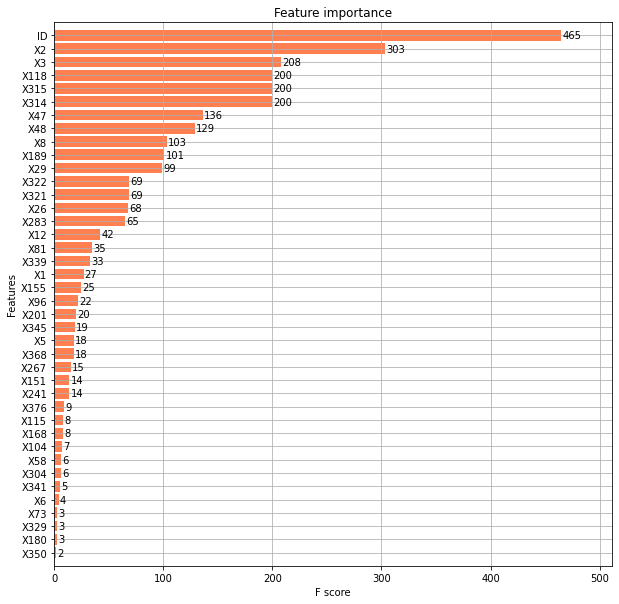

In [54]:
def xgb_r2_score(preds, final):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'n_trees': 520, 
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.98,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

final = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params), final, num_boost_round=200, feval=xgb_r2_score, maximize=True)



fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=40, height=0.8, ax=ax, color = 'coral')
print("Feature Importance by XGBoost")
plt.show()

In [55]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=420)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(test)

xgb_params = {
    'n_trees': 500, 
    'eta': 0.0050,
    'max_depth': 3,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(train_y), # base prediction = mean(target)
    'silent': 1
}

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(xgb_params, d_train, 1050 , watchlist, early_stopping_rounds=70, feval=xgb_r2_score, 
                maximize=True, verbose_eval=10)

[15:50:29] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:12.74916	valid-rmse:12.20455	train-r2:0.00550	valid-r2:0.00623
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 70 rounds.
[10]	train-rmse:12.41054	valid-rmse:11.83555	train-r2:0.05763	valid-r2:0.06541
[20]	train-rmse:12.09687	valid-rmse:11.49136	train-r2:0.10466	valid-r2:0.11898
[30]	train-rmse:11.80469	valid-rmse:11.16995	train-r2:0.14739	valid-r2:0.16758
[40]	train-rmse:11.53329	valid

In [ ]:
#finding R2 for 'valid' dataset

In [56]:
p = clf.predict(d_valid)
r2 = r2_score(y_valid, p)


In [57]:
r2

0.6359896502188037

In [58]:
id_vals = test.ID.values
output = clf.predict(d_test)
hyp_df = pd.DataFrame()
hyp_df["id"] = id_vals
hyp_df["y"] = output

hyp_df.head()

,id,y
0,1,80.898560
1,2,97.541428
2,3,79.710899
3,4,79.669182
4,5,114.818031


In [59]:
hyp_df.to_csv("hyperxgb.csv",index=False)

### R2 Score : 0.55492 (after uploading csv on kaggle)

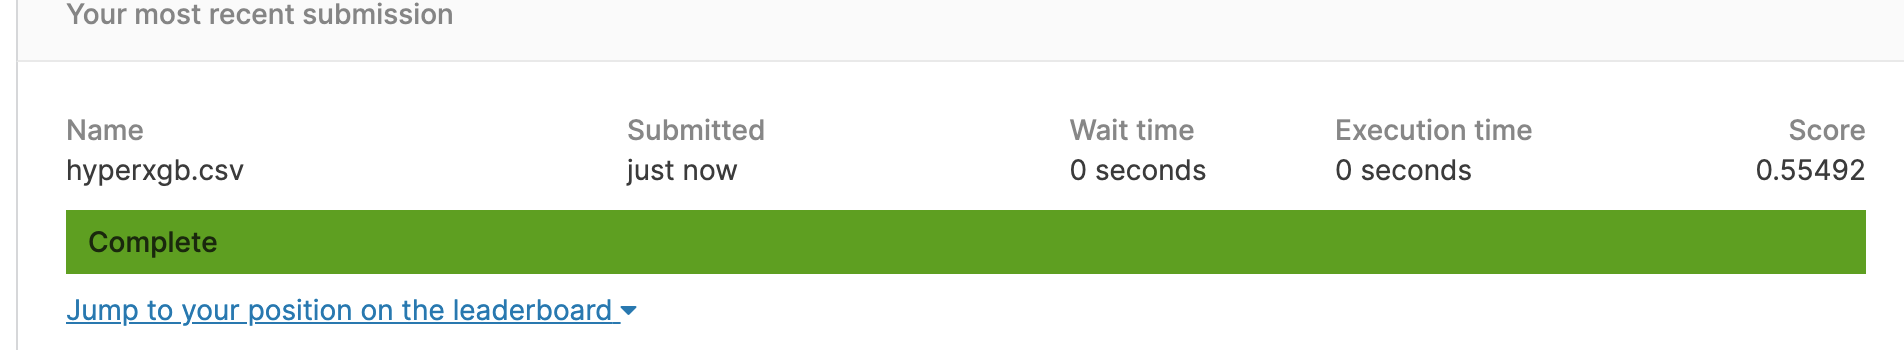

In [52]:
from PIL import Image
img = Image.open("kaggle_hyperxgb.png")
img

---

### let's try PCA ,ICA decomposition before tuning XGB Regressor 

### Add decomposed components: PCA / ICA etc.

In [46]:
#PCA 

from sklearn.decomposition import PCA, FastICA
n_comp = 10

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train.drop(["y"], axis=1))
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train.drop(["y"], axis=1))
ica2_results_test = ica.transform(test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
y_train = train["y"]
y_mean = np.mean(y_train)



##Note : this code is taken from kaggle notebook

In [47]:

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(train.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=500, 
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

[22:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue

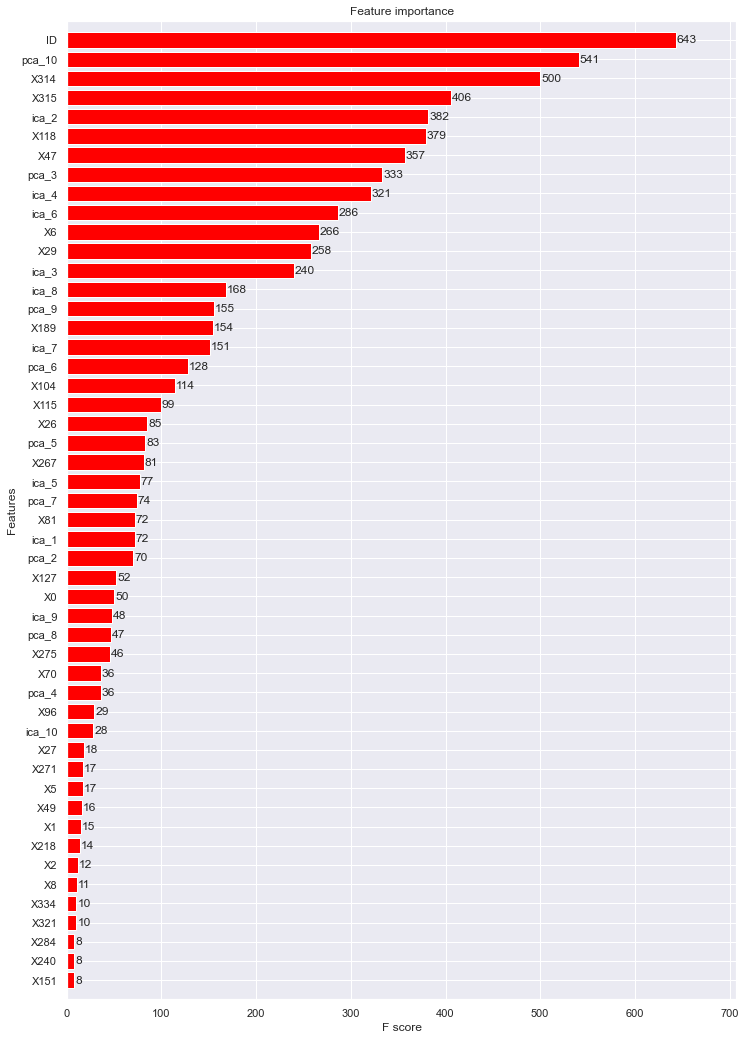

In [49]:
## Plotting feature importance 
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax,color = 'red')
plt.show()

In [63]:
# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score

# now fixed, correct calculation
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.6106206761345796


In [64]:
# make predictions and save results
y_pred = model.predict(dtest)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('hyperxgbpca.csv'.format(xgb_params['max_depth']), index=False)

### Coefficent of Determination( R2 ) : 0.55724  (Kaggle Submission) 

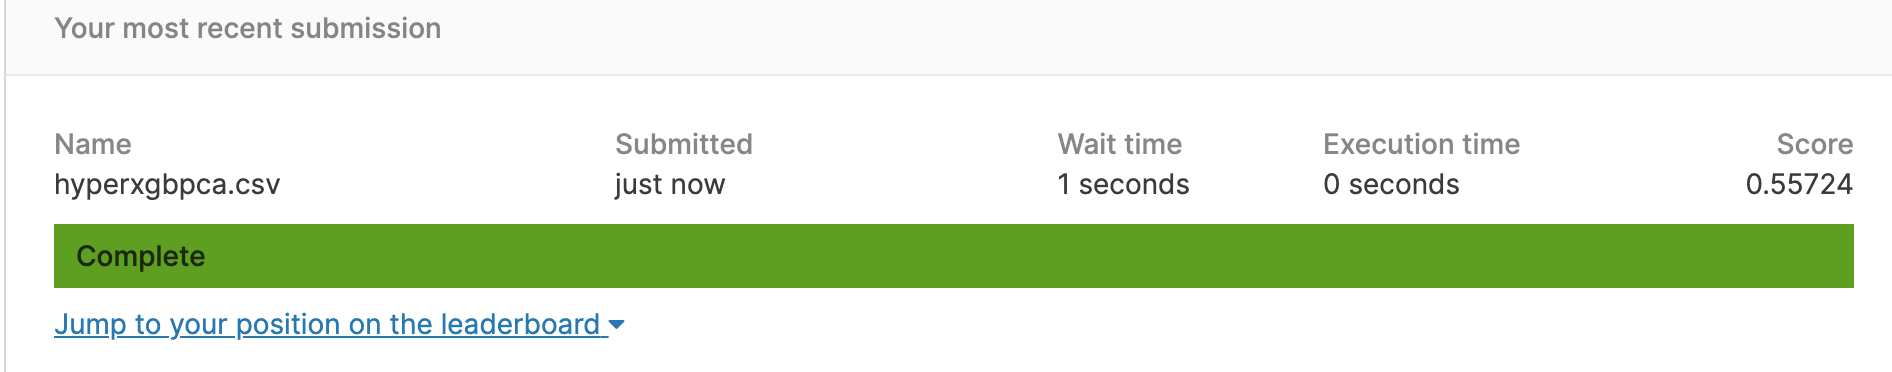

In [53]:
from PIL import Image
img = Image.open("kaggle_hyperxgbpca.png")
img

---

### Summary 
Overall most of kaggle notebooks handled this competition using xgboost. They performed exploratory data analysis, and modeled it using xgboost. However most of them didn't consider things like outliers handling, correlation between binary features,feature importance, etc. which has been performed in this notebook.

Contributions:<br>
Performed Extensive Exploratory Data Analysis In order to get in detail insights which helped analyzing some important features.<br>
Analyzed that feature 'ID' does play important role in prediction of y. Didn't drop it.<br>
Found that feature X4 doesn't play role and dropped it. <br>
Plotted Feature Importance Graph.<br>
Not just stopped at hyperparamter tuning. Used PCA and ICA which helped increasing R2 score by approx. 0.3 <br>
(Referred one kaggle notebook to understand and perform PCA,ICA)


### Conclusion:
Successfully implemented XGBoost Regressor on given data and achieved Coefficient of Determination (R2 Score) of 0.55724.<br>
XGB Regressor Model got improved from 0.47819 to 0.55724 after hyperparameter tuning and use of PCA, ICA decomposition.<br>
FT3.csv is the final submission on kaggle which gave Coefficient of Determination of 0.55724.<br>

### Important Citations: 
https://xgboost.readthedocs.io/en/latest/python/python_api.html <br>
https://towardsdatascience.com/xgboost-python-example-42777d01001e <br>
https://www.datacamp.com/community/tutorials/xgboost-in-python <br>
https://xgboost.readthedocs.io/en/latest/parameter.html <br>
https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/ <br>
https://www.kaggle.com/gpapadop79/mercedez-baseline-2 <br>
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 <br>
https://www.youtube.com/watch?v=eYxwWGJcOfw&list=PL5-da3qGB5IB-Xdpj_uXJpLGiRfv9UVXI&ab_channel=StatisticalLearning<br>


##### Contribution Statement: 
Cited reference are used while making contributions to this notebook. Other contributions are mentioned in summary section.PCA, ICA and some part of Hyperparmeter tuning has been taken from kaggle notebook. Other code is written by me. 